# Clustering with K-Means
Dataset:
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Number of Attributes:
* 13 numeric, predictive attributes and the class

Attribute Information:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [34]:
# Function to perform KMeans clustering and calculate silhouette scores
def find_optimal_k(data, max_k=10):
  """
    Finds the optimal number of clusters (K) for K-Means clustering using silhouette scores.

    The function iterates over a range of K values from 2 to `max_k`, performs K-Means clustering
    for each K, and calculates the silhouette score to evaluate the clustering quality. The optimal
    K is determined as the one with the highest silhouette score, and a plot of the silhouette
    scores for each K is generated.

    Parameters:
    ----------
    data : array-like, shape (n_samples, n_features)
        The dataset to be clustered, typically scaled, with rows representing samples and columns
        representing features.

    max_k : int, optional (default=10)
        The maximum number of clusters (K) to consider when evaluating the silhouette score.
        The function will compute silhouette scores for values of K ranging from 2 to `max_k`.

    Returns:
    -------
    optimal_k : int
        The number of clusters (K) that yields the highest silhouette score.

    Notes:
    -----
    - The silhouette score measures how well clusters are defined. A higher score indicates that
      clusters are well-separated.
    - A plot of silhouette scores versus K values is displayed to visualize the performance of
      different K values.

    Example:
    --------
    >>> find_optimal_k(data_scaled, max_k=10)
    """

  silhouette_scores = []
  K_values = range(2, max_k + 1)

  # Try different values of K (number of clusters)
  for K in K_values:
      kmeans = KMeans(n_clusters=K, init='random', n_init=1, random_state=42)
      kmeans.fit(data)
      cluster_labels = kmeans.labels_
      silhouette_avg = silhouette_score(data, cluster_labels)
      silhouette_scores.append(silhouette_avg)

  # Plot silhouette scores for each K value
  plt.figure(figsize=(8, 6))
  plt.plot(K_values, silhouette_scores, marker='o')
  plt.title('Silhouette Score for different K values')
  plt.xlabel('Number of clusters (K)')
  plt.ylabel('Silhouette Score')
  plt.grid(True)
  plt.show()

  # Find the optimal K (highest silhouette score)
  optimal_k = K_values[np.argmax(silhouette_scores)]
  print(f"Optimal number of clusters: {optimal_k}")

  return optimal_k

In [26]:
# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine_df.values)
pd.DataFrame(data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


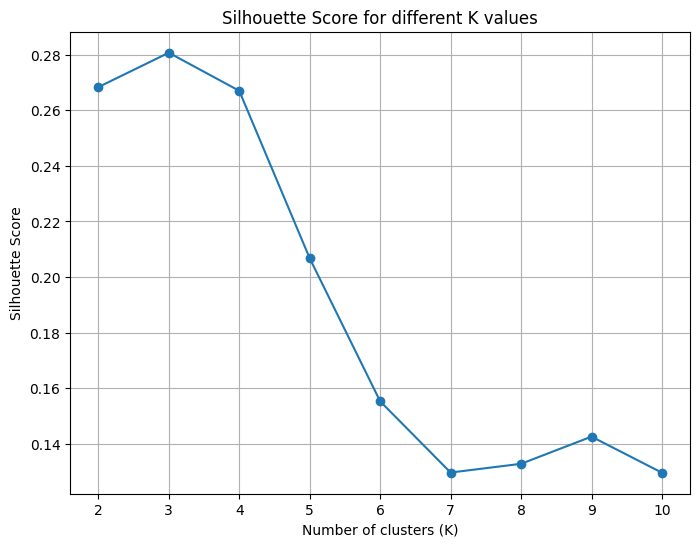

Optimal number of clusters: 3


In [28]:
# Find the optimal K based on silhouette score
optimal_k = find_optimal_k(data_scaled, max_k=10)

In [29]:
# Perform KMeans clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='random', n_init=1, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
wine_df['Cluster'] = cluster_labels

# Display the first few rows of the dataset with cluster labels
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


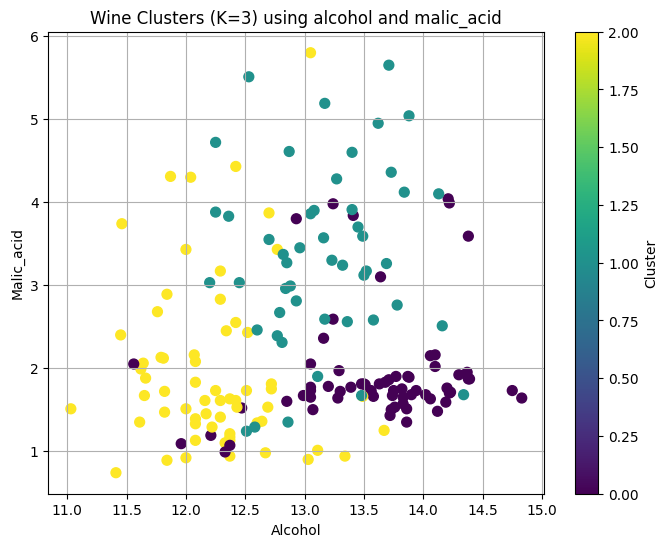

   alcohol  malic_acid  Cluster
0    14.23        1.71        0
1    13.20        1.78        0
2    13.16        2.36        0
3    14.37        1.95        0
4    13.24        2.59        0


In [30]:
# Select two features for plotting (alcohol and malic_acid)
'''
* 'Malic Acid' provides a strong link to wines tasting 'flat' if there is not enough. If there is too much the wine will taste 'sour'.
* 'Alcohol' represents the alcohol content in the wine, typically measured as a percentage of volume.
'''
feature_x = 'alcohol'
feature_y = 'malic_acid'

# Plot the clusters using the selected features
plt.figure(figsize=(8, 6))
plt.scatter(wine_df[feature_x], wine_df[feature_y], c=wine_df['Cluster'], cmap='viridis', s=50)
plt.title(f'Wine Clusters (K={optimal_k}) using {feature_x} and {feature_y}')
plt.xlabel(f'{feature_x.capitalize()}')
plt.ylabel(f'{feature_y.capitalize()}')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the first few rows of the dataset with cluster labels
print(wine_df[[feature_x, feature_y, 'Cluster']].head())